In [25]:
# importing libraries

import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import signal
import sympy

## 1. Multiple frequency Sinusoidal signal

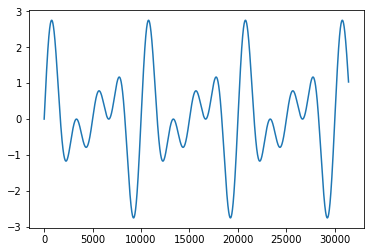

In [26]:
t = np.arange(0, np.pi, 0.0001)
y_sin = np.sin(t*2*np.pi*2) + np.sin(2*np.pi*3*t) + np.sin(2*np.pi*4*t)
plt.plot(y_sin)

## 2. ECG signal (Given data)

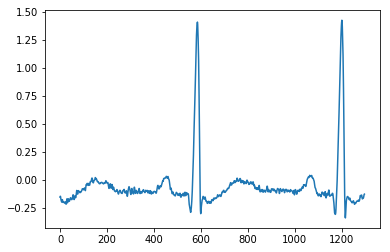

In [27]:
with open('ECG signal.txt') as f:
    y_ecg = [float(line.strip()) for line in f.readlines()]

plt.plot(y_ecg)

## 3. Adding Noise

### i) Random Noise

#### After adding random noise to sinusoidal signal

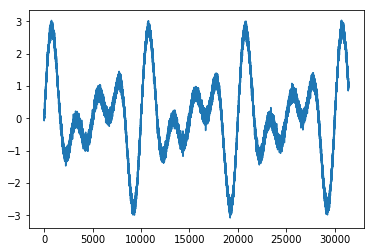

In [28]:
# np.random.normal(<mean of the normal distribution>, <standard deviation of the normal distribution>, <number of elements>)
y_sin_ran = y_sin + np.random.normal(0, 0.1, len(y_sin))
plt.plot(y_sin_ran)

#### After adding random noise to ECG signal

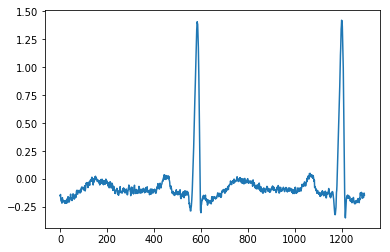

In [29]:
y_ecg_ran = y_ecg + np.random.normal(0, 0.01, len(y_ecg))
plt.plot(y_ecg_ran)

### ii) Impulse noise

In [30]:
#scipy.signal.unit_impulse(shape, idx=None, dtype=<class 'float'>)
def impulse_noise(input_signal):
    imp_noise = signal.unit_impulse(len(input_signal), idx=random.randint(0,1000))
    for i in range(1000, len(input_signal), 1000):
        if i+1000 < len(input_signal):
            temp = signal.unit_impulse(len(input_signal), idx=random.randint(i,i+1000))
            imp_noise += temp
    return imp_noise + input_signal

#### After adding Impulse noise to Sinusoidal Signal

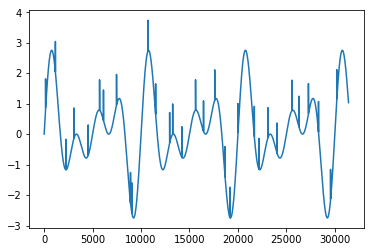

In [31]:
y_sin_imp = impulse_noise(y_sin)
plt.plot(y_sin_imp)

#### After adding Impulse noise to ECG Signal

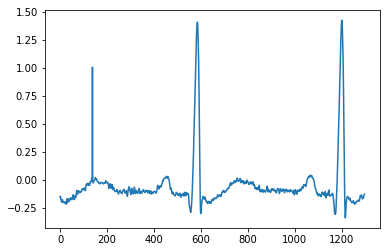

In [32]:
y_ecg_imp = impulse_noise(y_ecg)
plt.plot(y_ecg_imp)

## 4. Mean filter

In [33]:
global first_time
first_time = True

def mean_filter(input_signal, window_length):
    l = len(input_signal)
    global first_time
    
    if first_time:
        window_length = int(input('Enter window length you want to try '))
        while window_length <= 0 or window_length > l:
            window_length = int(input('Enter window length less than {} '.format(l)))
        

    if window_length <= 0 or window_length > l:
        pass
    # padding
    t = np.zeros(window_length//2)
    #print(y)
    input_signal = np.append(t, input_signal)
    #print(y)
    input_signal = np.append(input_signal, t)

    y_mean_filter = np.array([])
    for i in range(l):
        temp = np.average(input_signal[i:i+window_length])
        y_mean_filter = np.append(y_mean_filter, temp)
    
    if first_time:
        plt.figure()
        plt.plot(y_mean_filter)
        first_time = False
        #print(first_time)
        
    return y_mean_filter

#plt.plot(mean_filter(y_ecg, 3))

## i) Analysis with different window length

### For Sinusoidal signal

#### For random noise

Enter window length you want to try 11
Window length with minimum error 84


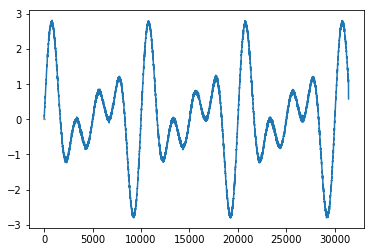

In [34]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_sin - np.array(mean_filter(y_sin_ran, i))))/ len(y_sin)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

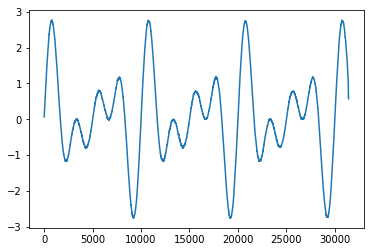

In [35]:
plt.plot(mean_filter(y_sin_ran, min_window_length))
#plt.plot(y_sin)

#### For Impulse noise

Window length with minimum error 28


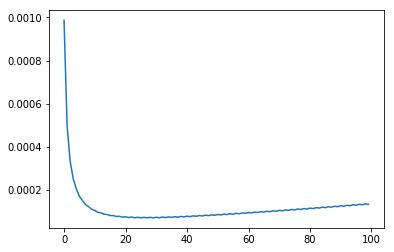

In [36]:
error_imp = [0] * 100
min_window_length_imp = 0
min_error_imp = float('inf')
for i in range(1,101):
    error_imp[i-1] = sum(np.square(y_sin - np.array(mean_filter(y_sin_imp, i))))/ len(y_sin)
    if min_error_imp > error_imp[i-1]:
        min_error_imp = error_imp[i-1]
        min_window_length_imp = i

plt.plot(error_imp)
print("Window length with minimum error", min_window_length_imp)

#### Plot with suitable window length

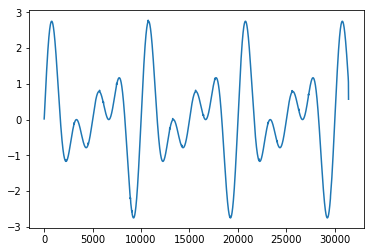

In [37]:
plt.plot(mean_filter(y_sin_imp, min_window_length_imp))
#plt.plot(y_sin)

### For ECG Signal

#### For random noise

Window length with minimum error 3


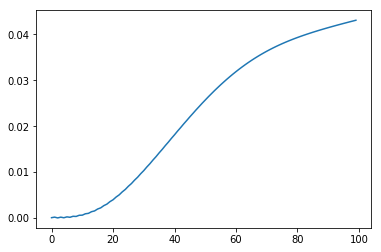

In [38]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_ecg - np.array(mean_filter(y_ecg_ran, i))))/ len(y_ecg)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

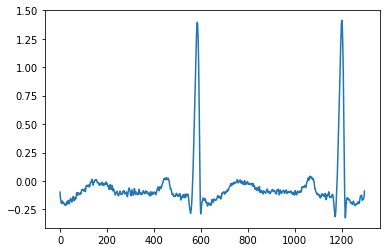

In [39]:
plt.plot(mean_filter(y_ecg_ran, min_window_length))
#plt.plot(y_ecg)

#### For Impulse noise

Window length with minimum error 5


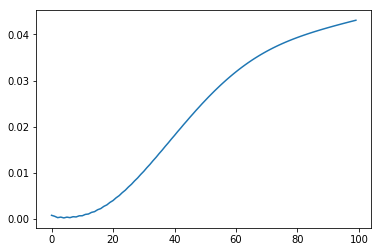

In [40]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_ecg - np.array(mean_filter(y_ecg_imp, i))))/ len(y_ecg)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

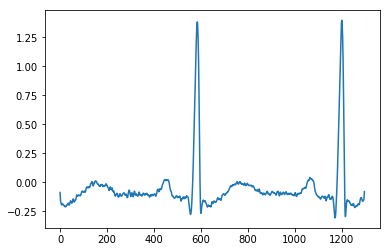

In [41]:
plt.plot(mean_filter(y_ecg_ran, min_window_length))
#plt.plot(y_ecg)

## 5. Median Filter

In [43]:
global first_time
first_time = True

def median_filter(input_signal, window_length):
    l = len(input_signal)
    global first_time
    
    if first_time:
        window_length = int(input('Enter window length you want to try '))
        while window_length <= 0 or window_length > l:
            window_length = int(input('Enter window length less than {} '.format(l)))
        

    if window_length <= 0 or window_length > l:
        pass
    # padding
    t = np.zeros(window_length//2)
    #print(y)
    input_signal = np.append(t, input_signal)
    #print(y)
    input_signal = np.append(input_signal, t)

    y_median_filter = np.array([])
    for i in range(l):
        temp = np.median(input_signal[i:i+window_length])
        y_median_filter = np.append(y_median_filter, temp)
    
    if first_time:
        plt.figure()
        plt.plot(y_median_filter)
        first_time = False
        
    return y_median_filter

#plt.plot(median_filter(y_ecg_imp, 3))

### For Sinusoidal signal

#### For random noise

Window length with minimum error 100


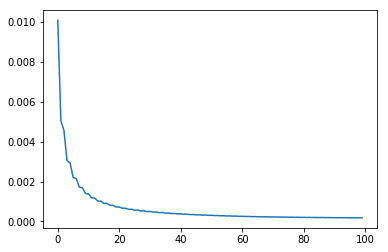

In [44]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_sin - np.array(median_filter(y_sin_ran, i))))/ len(y_sin)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.figure()
plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

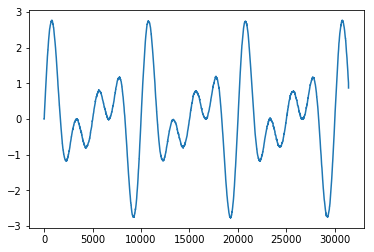

In [45]:
plt.plot(median_filter(y_sin_ran, min_window_length))
#plt.plot(y_sin)

#### For Impulse noise

Window length with minimum error 3


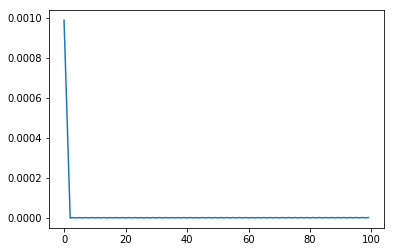

In [46]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_sin - np.array(median_filter(y_sin_imp, i))))/ len(y_sin)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.figure()
plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

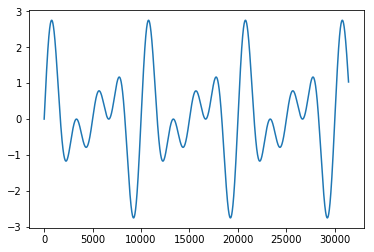

In [47]:
plt.plot(median_filter(y_sin_imp, min_window_length))
#plt.plot(y_sin)

### For ECG signal

#### For random noise

Window length with minimum error 3


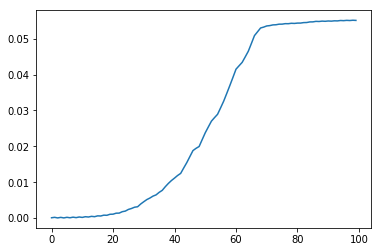

In [48]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_ecg - np.array(median_filter(y_ecg_ran, i))))/ len(y_ecg)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.figure()
plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

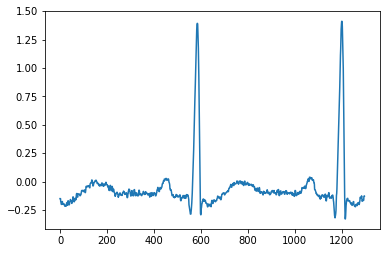

In [49]:
plt.plot(median_filter(y_ecg_ran, min_window_length))
#plt.plot(y_ecg_ran)

#### For Impulse noise

Window length with minimum error 3


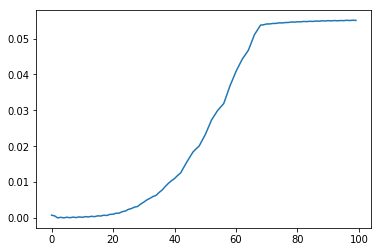

In [50]:
error = [0] * 100
min_window_length = 0
min_error = float('inf')
for i in range(1,101):
    error[i-1] = sum(np.square(y_ecg - np.array(median_filter(y_ecg_imp, i))))/ len(y_ecg)
    if min_error > error[i-1]:
        min_error = error[i-1]
        min_window_length = i

plt.figure()
plt.plot(error)
print("Window length with minimum error", min_window_length)

#### Plot with suitable window length

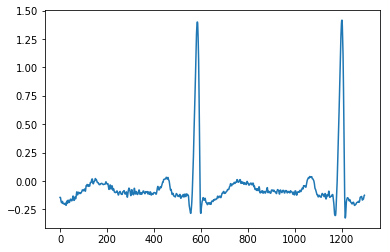

In [51]:
plt.plot(median_filter(y_ecg_imp, min_window_length))
#plt.plot(y_ecg_imp)

## 5. FIR filters

In [ ]:
#integrate(f, (x, a, b)) returns the definite integral ∫bafdx
w = Symbol('w')